In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook 
from time import time
from matplotlib import animation

In [3]:
a = 5.204
e = 0.0489 
h = 0.005
s = time()

def eul_fwd(h,theta,prev):
    r = (prev[0]**2+prev[2]**2)**3/2
    matrix_x = np.array([[1,h],[-4*np.pi**2*h*np.cos(theta)/r,1]])
    matrix_y = np.array([[1,h],[-4*np.pi**2*h*np.sin(theta)/r,1]])
    
    xvprev = np.array([prev[0],prev[1]])
    yuprev = np.array([prev[2],prev[3]])
    
    xv = np.dot(matrix_x,xvprev)
    yu = np.dot(matrix_y,yuprev)
#     print(xv)
#     print(np.array([xv,yu]))
    return np.array([xv,yu])



theta = np.linspace(0.1,2*np.pi)
j=1
res_x = []
res_v = []
res_y = []
res_u = []

for i in theta:
    if j==1:
        prev = [1,0,5.204*(1-0.0489),-((4*np.pi**2*(1+0.0489))/(5.204*(1-0.0489)))**1/2] #x,v,y,u
    else:
        prev[0] = a[0][0]
        prev[1] = a[0][1]
        prev[2] = a[1][0]
        prev[3] = a[1][1]
    
    a = eul_fwd(h,i,prev)
    res_x.append(a[0][0])
    res_v.append(a[0][1])
    res_y.append(a[1][0])
    res_u.append(a[1][1])
    j=j+1

e = time()
print('time taken:',e-s)

('time taken:', 0.0024118423461914062)


<IPython.core.display.Javascript object>


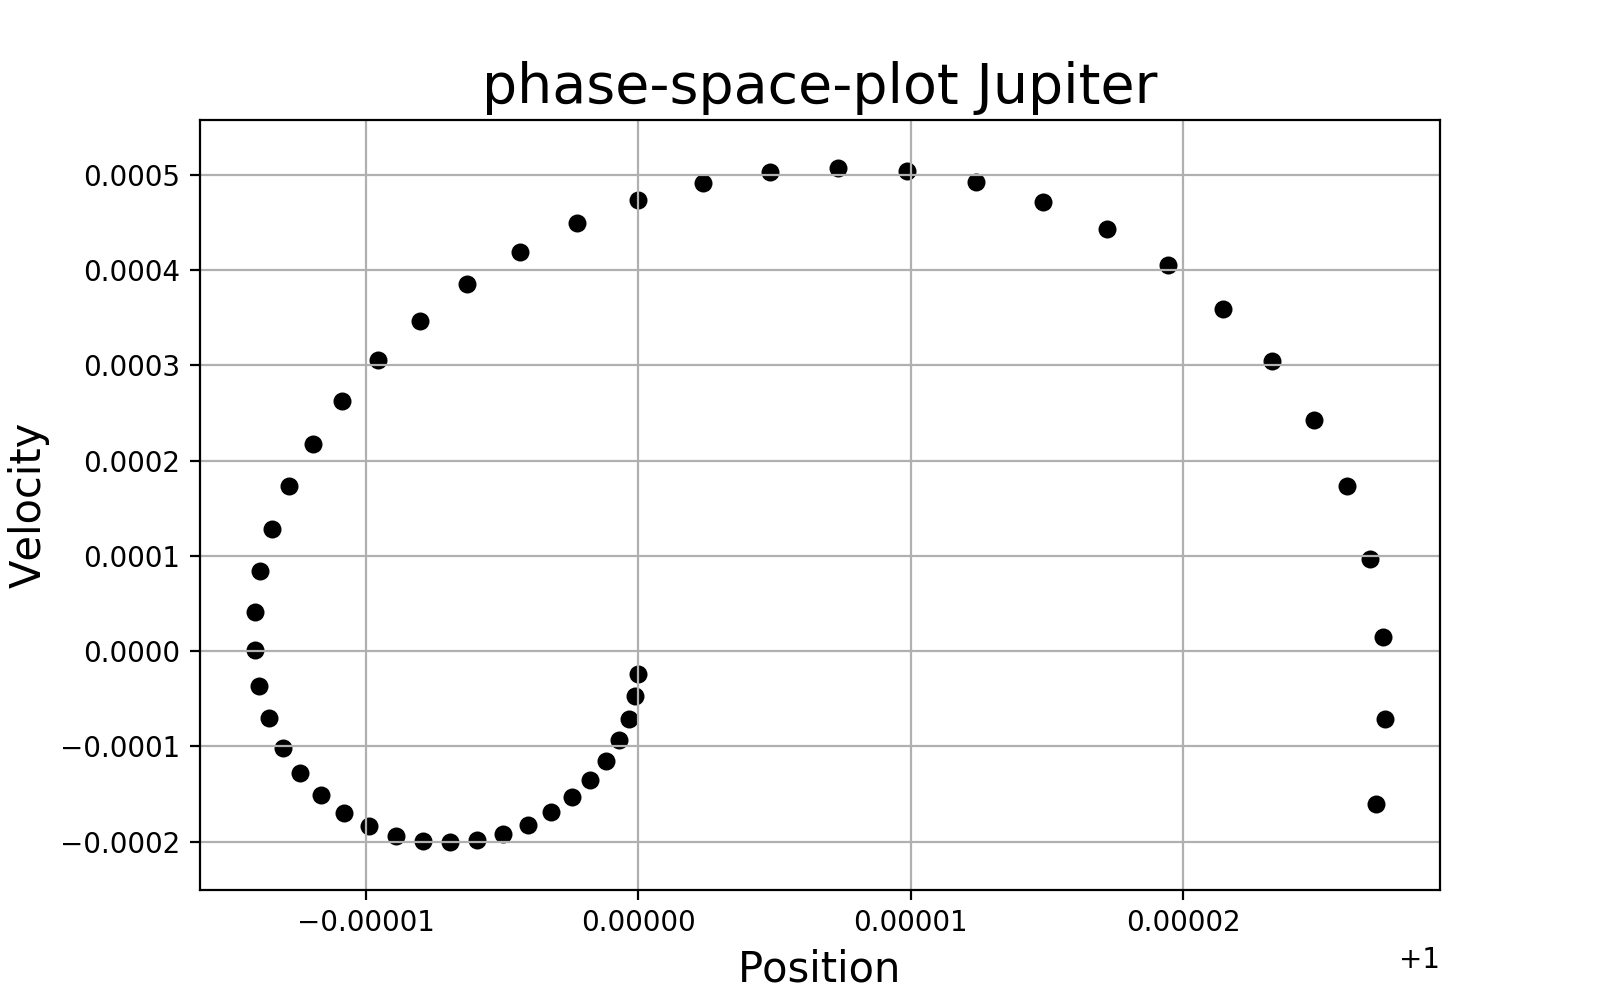

In [4]:
fig, ax = plt.subplots(1,1,figsize=(8,5))

ax.scatter(res_x, res_v, c='black', s=30)

ax.set_xlim(min(res_x)-0.000002,max(res_x)+0.000002)
ax.set_ylim(min(res_v)-0.00005,max(res_v)+0.00005)

ax.set_xlabel("Position", fontsize=15)
ax.set_ylabel("Velocity", fontsize=15)
ax.set_title("phase-space-plot Jupiter", fontsize=20)

ax.grid()

plt.show()